# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Using proper try to predict the number of wins

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
df=pd.read_csv(r"G:\shipra\Fliprobo internship\baseball.csv")

In [3]:
# Doing basic operations
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
# column names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
# Rename the columns 
df=df.rename(columns={'W':'Wins', 'R':'Runs' , 'AB':'At Bats' , 'H':'Hits' , '2B':'Doubles' , '3B':'Triples' , 'HR':'HomeRuns' , 'BB':'Base on Balls' , 'SO':'Strikeout' , 'SB':'Stolen Base' , 'RA':'Run Average' ,'ER': 'Earned Runs', 'ERA':'Earned Run Average' , 'CG':'Complete Game' , 'SHO':'Shutout' , 'SV':'Save' , 'E':'Errors'})
df

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Base on Balls,Strikeout,Stolen Base,Run Average,Earned Runs,Earned Run Average,Complete Game,Shutout,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
# Check the shape of datset
df.shape

(30, 17)

There are 30 rows and 17 columns in the dataset including the target variable.

'Wins' is the target column.

In [7]:
# Check the shape of datset
df.size

510

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   HomeRuns            30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strikeout           30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Run Average         30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shutout             30 non-null     int64  
 15  Save                30 non-null     int64  
 16  Errors    

There is no missing values in the dataset.
All columns are of integer datatype except  'Earned Run Average' column. It is of float datatype.

In [9]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Base on Balls,Strikeout,Stolen Base,Run Average,Earned Runs,Earned Run Average,Complete Game,Shutout,Save,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
# Check for any null values
df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
HomeRuns              0
Base on Balls         0
Strikeout             0
Stolen Base           0
Run Average           0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shutout               0
Save                  0
Errors                0
dtype: int64

# EDA : Exploratory Data Analysis

1. 'Runs' and 'Wins'

In [11]:
# finding the relation between runs and wins
df.groupby('Runs')['Wins'].mean()

Runs
573     67.0
613     71.0
622     76.0
626     63.0
640     64.0
644     80.0
647    100.0
650     74.0
655     68.0
656     76.0
661     85.0
667     92.0
669     81.0
683     90.0
689     85.5
694     68.0
696     83.5
697     98.0
703     83.0
713     81.0
720     79.0
724     95.0
729     86.0
737     68.0
748     78.0
751     88.0
764     87.0
891     93.0
Name: Wins, dtype: float64

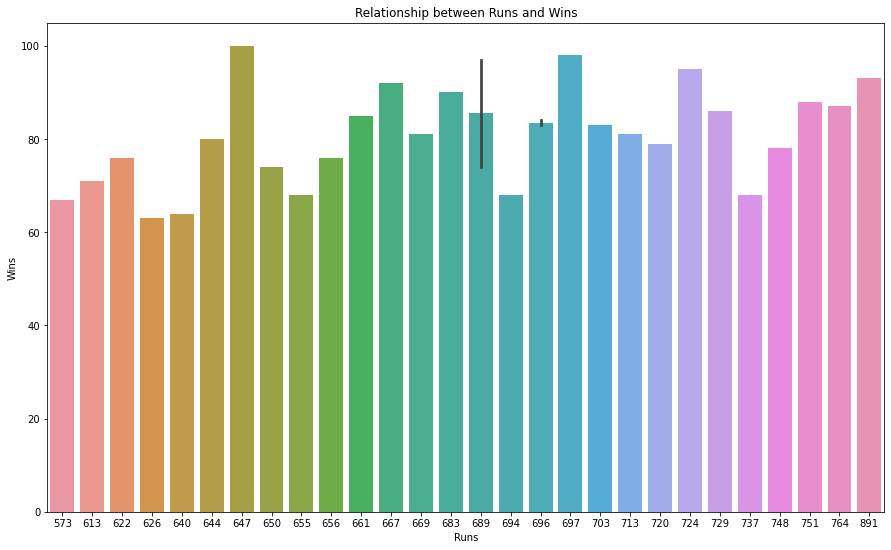

In [12]:
# plotting the graph between runs and wins
plt.figure(figsize=(15,9))
sns.barplot(x='Runs',y='Wins',data=df)
plt.title("Relationship between Runs and Wins")
plt.show()

2. 'At Bats' and 'Wins'

In [13]:
# finding the relation between runs and wins
df.groupby('Runs')['At Bats'].mean()

Runs
573    5420.0
613    5463.0
622    5533.0
626    5529.0
640    5571.0
644    5485.0
647    5484.0
650    5457.0
655    5480.0
656    5544.0
661    5417.0
667    5385.0
669    5439.0
683    5527.0
689    5548.0
694    5600.0
696    5516.0
697    5631.0
703    5428.0
713    5485.0
720    5649.0
724    5575.0
729    5459.0
737    5572.0
748    5640.0
751    5511.0
764    5567.0
891    5509.0
Name: At Bats, dtype: float64

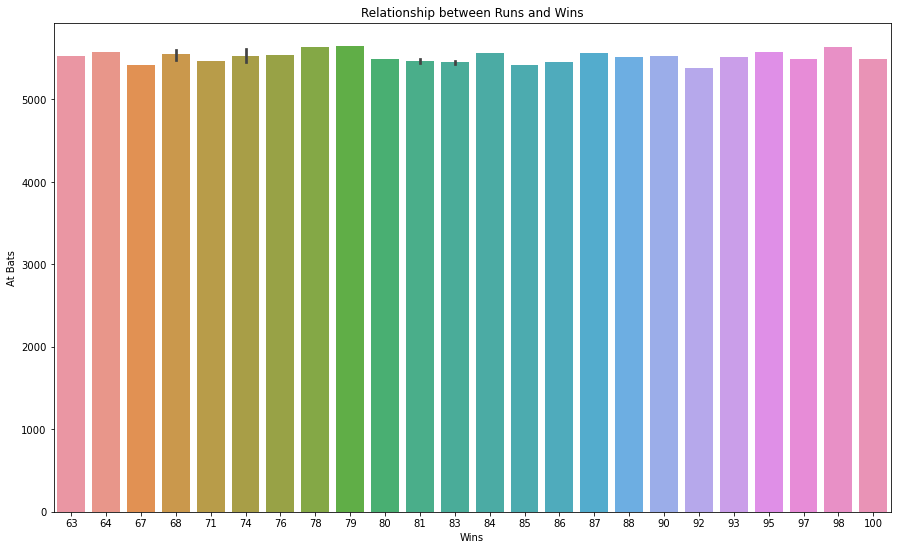

In [14]:
# plotting the graph between runs and wins
plt.figure(figsize=(15,9))
sns.barplot(x='Wins', y='At Bats', data=df)
plt.title("Relationship between Runs and Wins")
plt.show()

# checking all variables at once


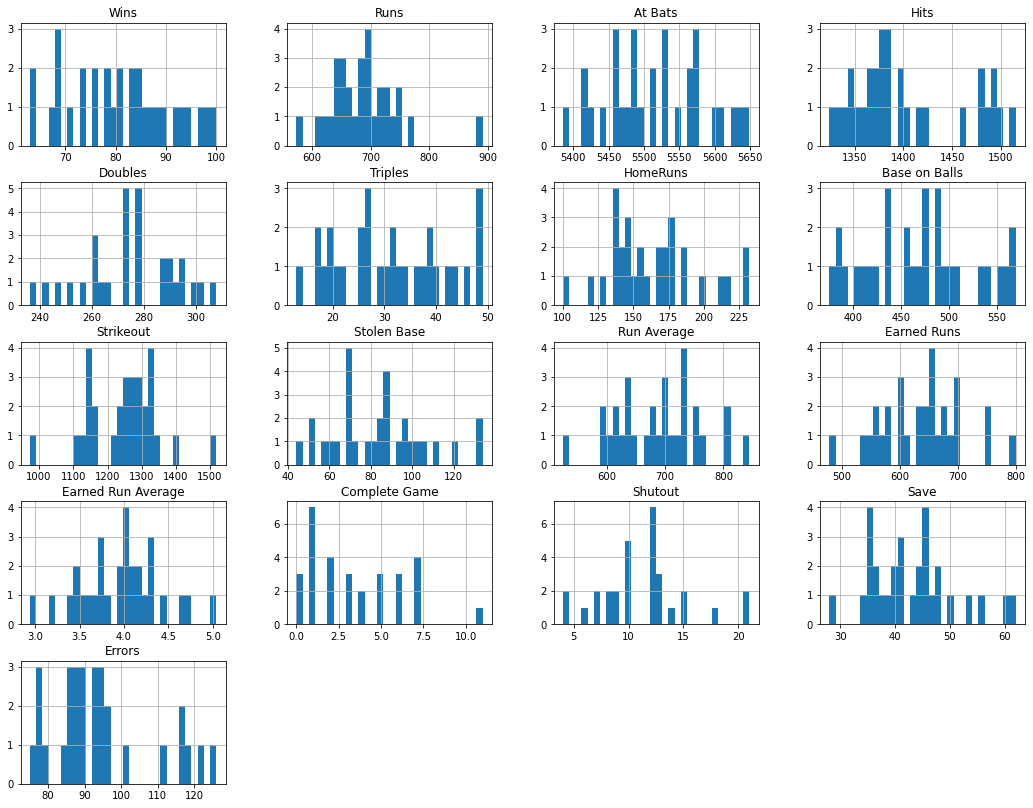

In [15]:
# plotting the histogram for univariant analysis to check normal distribution
df.hist(figsize=(18,14) , bins=30, grid=True)
plt.show()

# Pairplot for bivarinnat analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

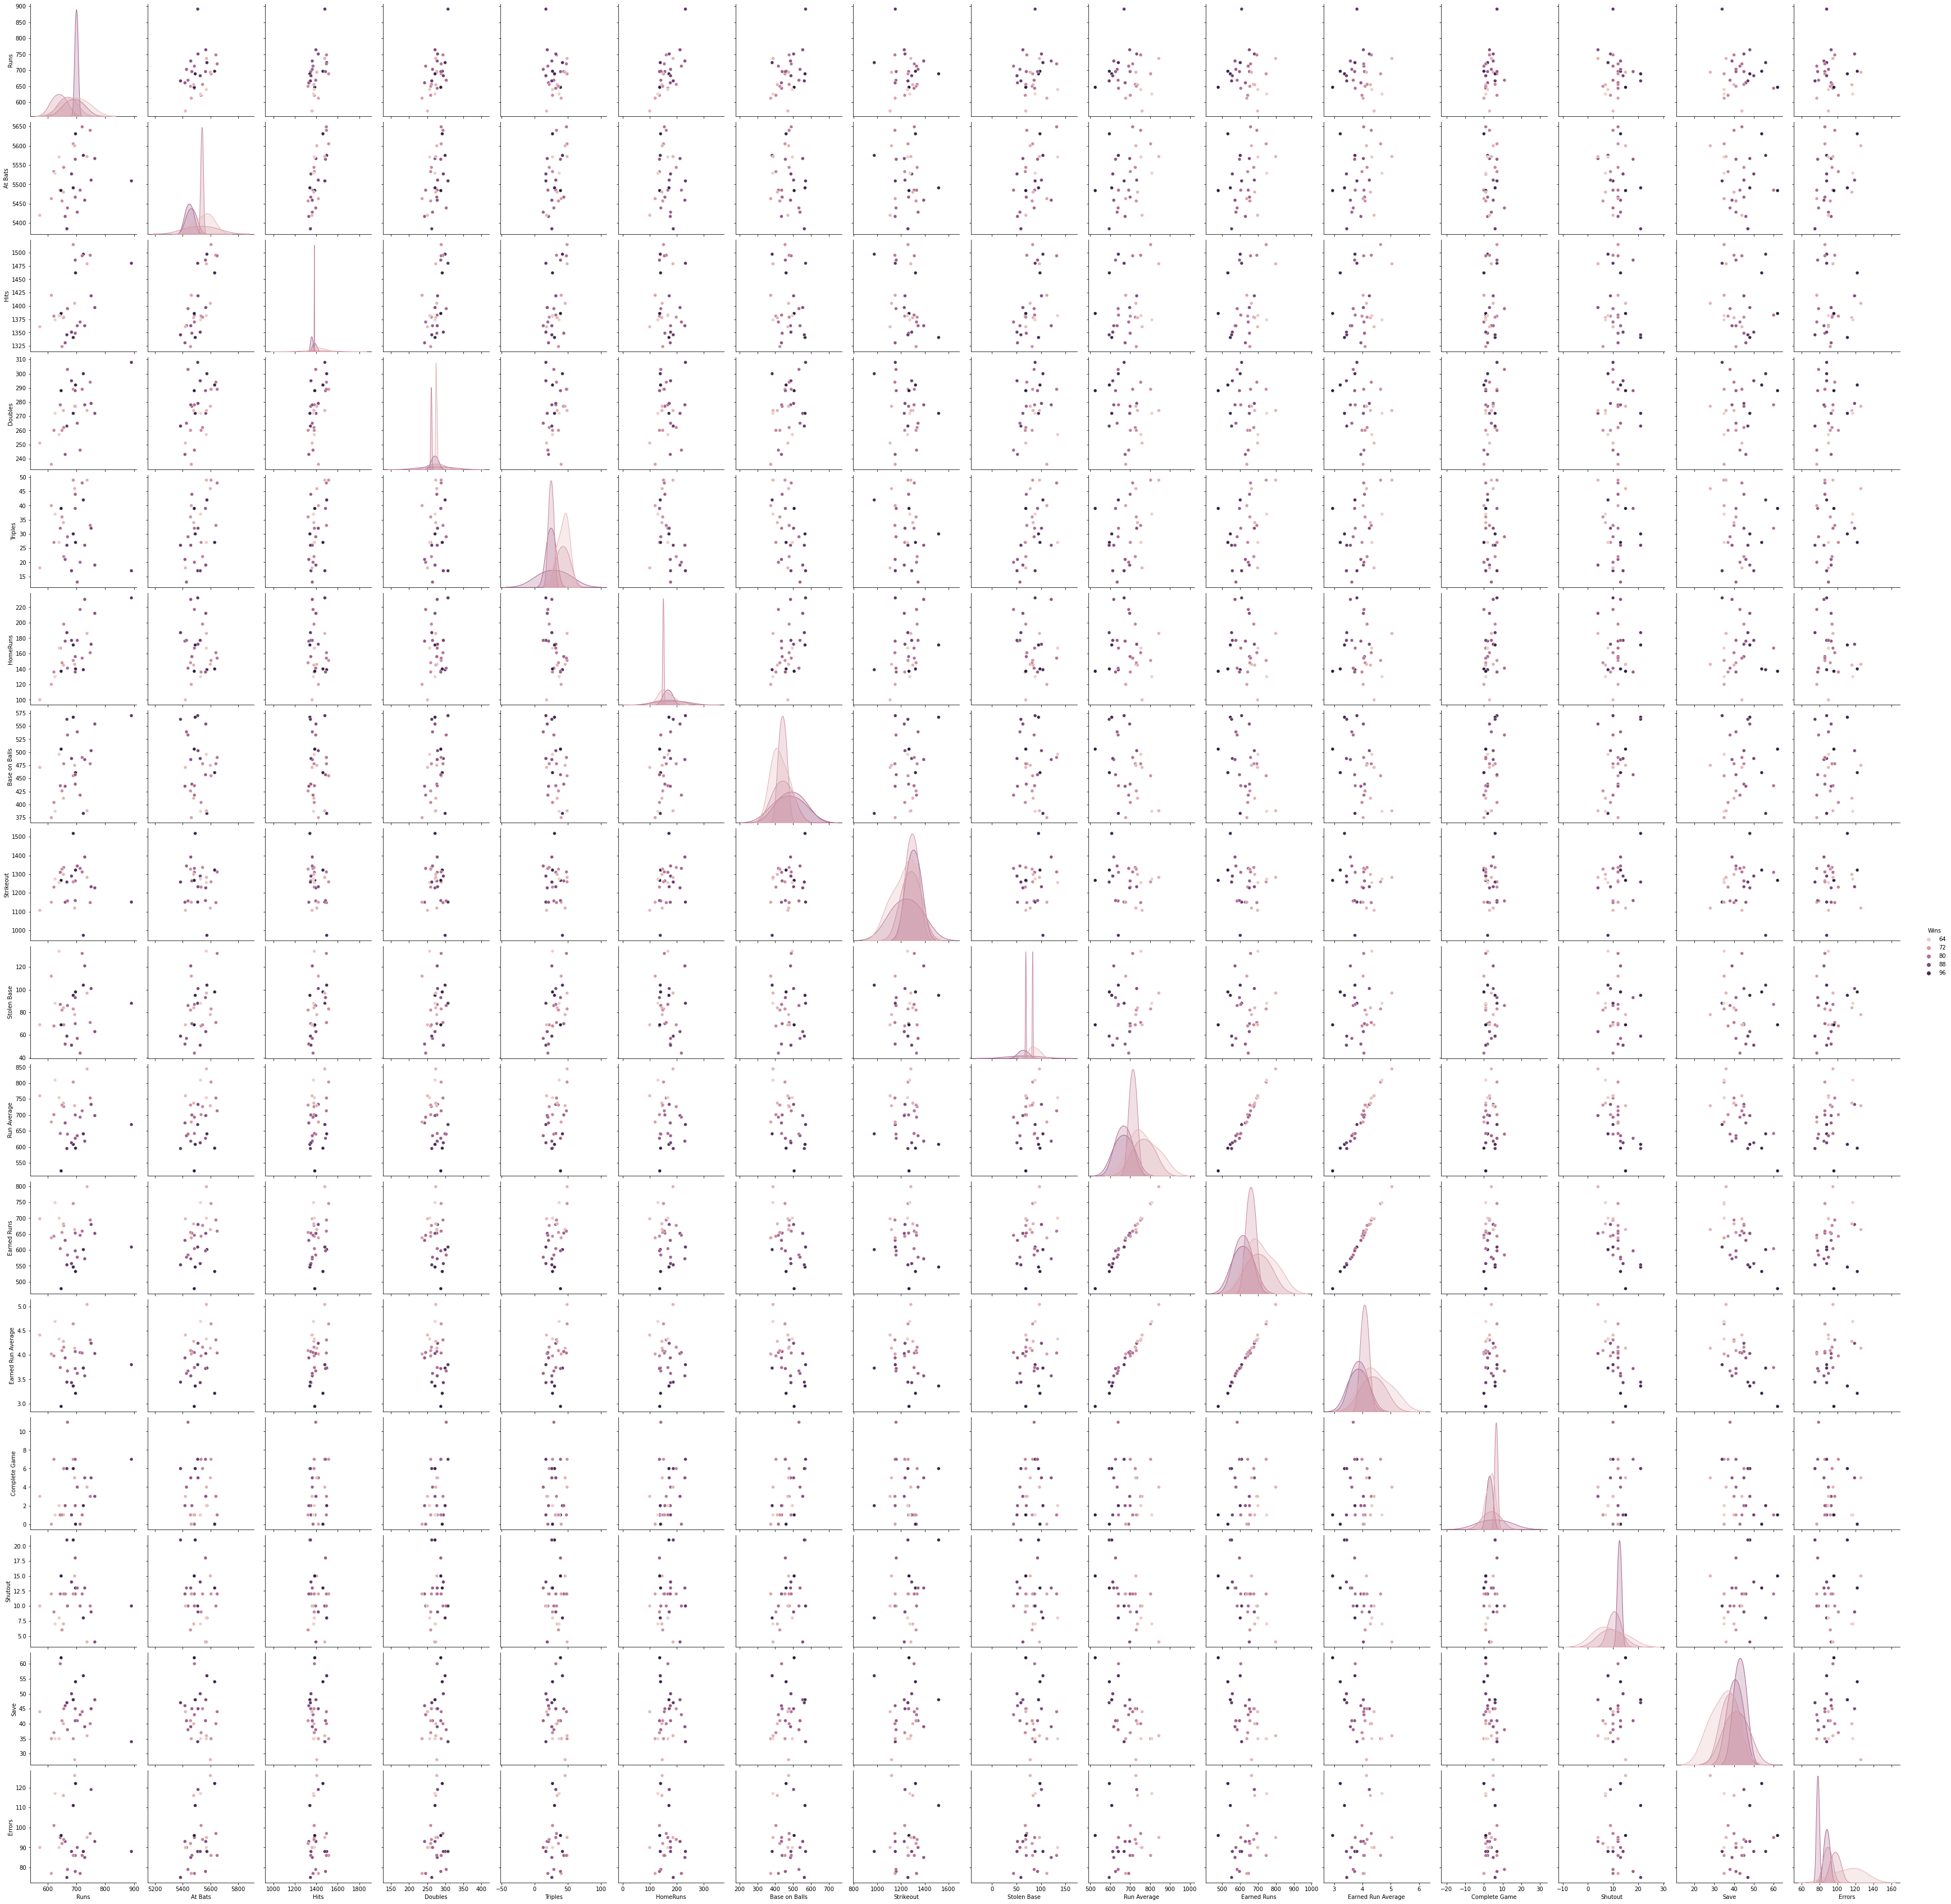

In [16]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='Wins', size = 3.0)
plt.show()

In [17]:
# Checkinig the description of the dataset using describe() function.

df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Base on Balls,Strikeout,Stolen Base,Run Average,Earned Runs,Earned Run Average,Complete Game,Shutout,Save,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


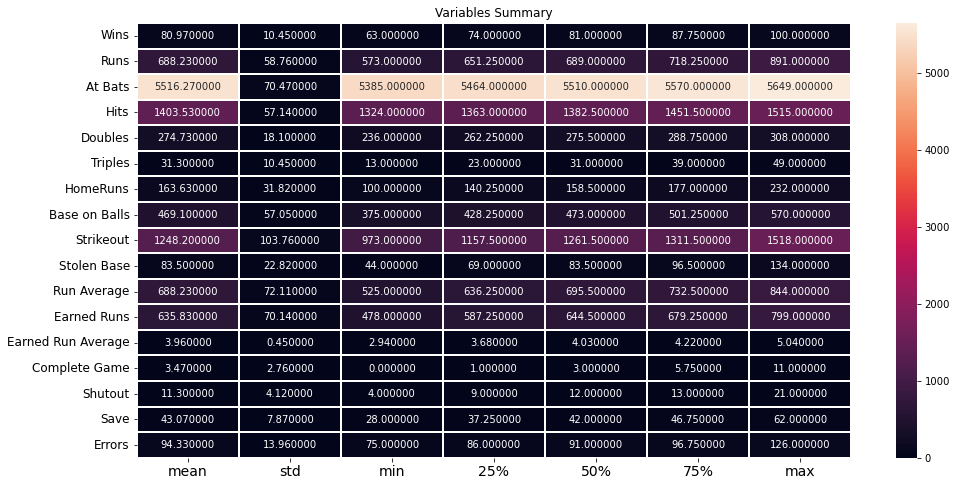

In [18]:
# plot the heatmap for describe
plt.figure(figsize=(16,8))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot = True, linewidth =0.45 , linecolor='white' , fmt='f')
plt.title("Variables Summary")
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

# Observations

In [19]:
# Check for correlation of variables
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Base on Balls,Strikeout,Stolen Base,Run Average,Earned Runs,Earned Run Average,Complete Game,Shutout,Save,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HomeRuns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeout,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


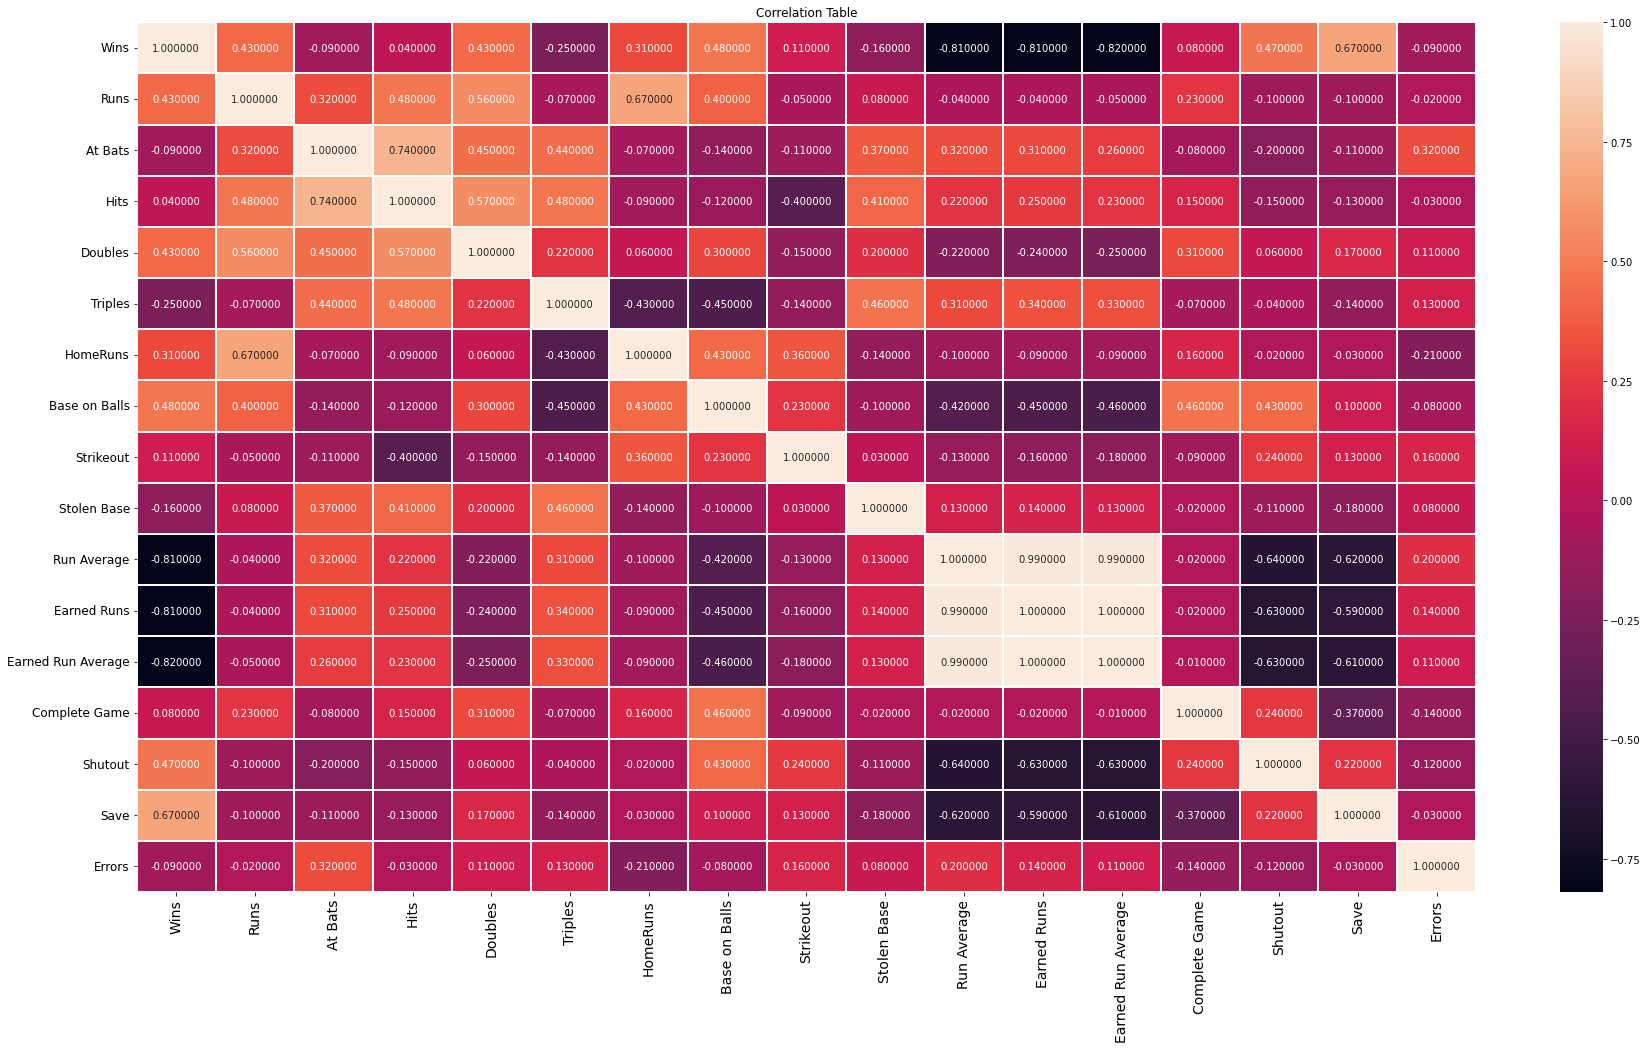

In [20]:
# plotting heatmap for correlation
plt.figure(figsize=[30,16])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

# Outlier Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

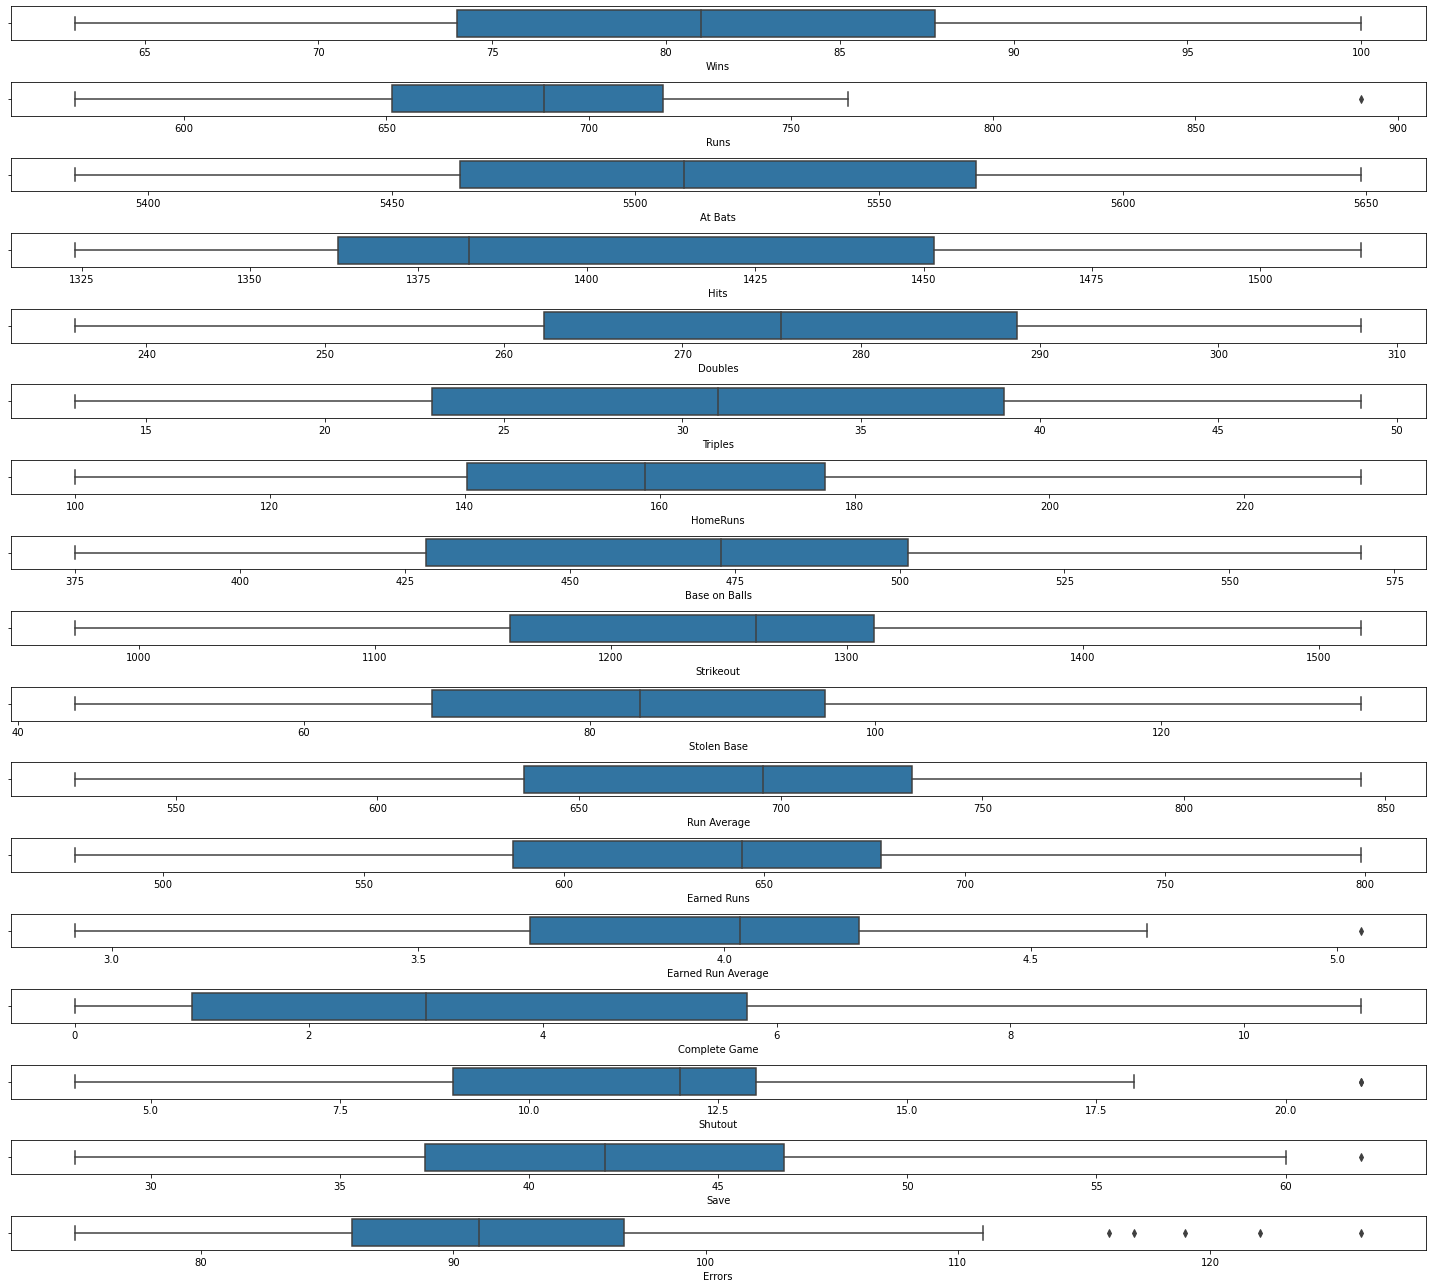

In [21]:
fig, axs = plt.subplots(17, figsize = (20,18))
plt1 = sns.boxplot(df['Wins'], ax = axs[0])
plt2 = sns.boxplot(df['Runs'], ax = axs[1])
plt3 = sns.boxplot(df['At Bats'], ax = axs[2])
plt4 = sns.boxplot(df['Hits'], ax = axs[3])
plt5 = sns.boxplot(df['Doubles'], ax = axs[4])
plt6 = sns.boxplot(df['Triples'], ax = axs[5])
plt7 = sns.boxplot(df['HomeRuns'], ax = axs[6])
plt8 = sns.boxplot(df['Base on Balls'], ax = axs[7])
plt9 = sns.boxplot(df['Strikeout'], ax = axs[8])
plt10 = sns.boxplot(df['Stolen Base'], ax = axs[9])
plt11 = sns.boxplot(df['Run Average'], ax = axs[10])
plt12 = sns.boxplot(df['Earned Runs'], ax = axs[11])
plt13 = sns.boxplot(df['Earned Run Average'], ax = axs[12])
plt14 = sns.boxplot(df['Complete Game'], ax = axs[13])
plt15 = sns.boxplot(df['Shutout'], ax = axs[14])
plt16 = sns.boxplot(df['Save'], ax = axs[15])
plt17 = sns.boxplot(df['Errors'], ax=axs[16])
plt.tight_layout()

In [22]:
# Check for skewness
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
HomeRuns              0.516441
Base on Balls         0.158498
Strikeout            -0.156065
Stolen Base           0.479893
Run Average           0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shutout               0.565790
Save                  0.657524
Errors                0.890132
dtype: float64

# Data Cleaning

# Removing Outliers

In [23]:
from scipy.stats import  zscore

z=np.abs(zscore(df))
z.shape

(30, 17)

In [24]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [25]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


 Dividing data into features

In [26]:
X=df_new.drop(['Wins'], axis=1)
y=df_new['Wins']

# Removing Skewness

Using Power Tranform

In [27]:
from sklearn.preprocessing import power_transform

X=power_transform(X)
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

# Standard Scaler

In [28]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

# Model Training

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.45,random_state=43)

# Linear Regression

In [30]:
from sklearn.linear_model  import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(f"Linear coefficients : {lr.coef_}")
print(f"Intercept : {lr.intercept_}")

# Predicting the new result
y_pred=lr.predict(X_test)
y_pred

Linear coefficients : [ 3.05141933e+00  4.52970994e-13  3.54827279e-13  1.14738589e+00
  1.73865426e+01  2.74725647e+01 -7.61615749e+00 -1.14681734e+01
 -1.96196921e+00  3.87588645e+01 -5.37663884e+01 -1.53829479e+01
 -1.40596456e+00  5.12367743e+00 -1.94859965e+01  9.41213126e+00]
Intercept : 80.59278095907734


array([ 95.30845723,  62.30833463, 169.37309579,  88.15782358,
        58.78232654,  89.90714354, 140.62230383,  50.25697502,
        80.23716013,  76.22455161,  69.19680085,  59.26370759,
        77.61091971, -35.05895224])

# Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

rid=Ridge(alpha=0.5)
rid.fit(X_train,y_train)

print(f"Ridge Coefficients : {rid.coef_}")
print(f"Intercept : {rid.intercept_}")

rid_pred = rid.predict(X_test)

rid_pred

Ridge Coefficients : [ 2.58914114  0.          0.         -0.37385275  0.48091456  0.82352388
 -0.58985338 -0.90011478 -0.17558689  0.51011801 -2.31895767 -3.38923658
  1.38365331  2.1142095   4.47657104  1.14011095]
Intercept : 81.53990356229244


array([92.74065128, 80.96808155, 75.35824025, 79.53972608, 89.77992752,
       80.45571524, 87.57238472, 63.21066019, 85.61807409, 66.77457225,
       84.83835256, 66.99039883, 85.69099863, 70.11942014])

# RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=0)

RF.fit(X_train,y_train)

rf_pred = RF.predict(X_test) 
rf_pred

array([91.28478571, 78.77015476, 77.64183333, 77.14954762, 93.31667857,
       78.19821429, 83.60600397, 72.27178968, 80.47100397, 74.77215476,
       88.4650754 , 75.71624603, 82.48612302, 76.72805159])

# KNeighborsRegressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(X_train, y_train)

knn_pred = KNN.predict(X_test)
knn_pred

array([87. , 80.5, 75. , 84. , 90.5, 78.5, 88. , 71. , 81. , 71. , 84. ,
       71. , 87.5, 80.5])

# Root Mean Squared Error

In [34]:
from sklearn import metrics
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_Ridge = np.sqrt(metrics.mean_squared_error(y_test, rid_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, knn_pred))

print('Root Mean Squared Error for LinearRegression is :', rmse_LR)
print('Root Mean Squared Error for Ridge Regression is :', rmse_Ridge)
print('Root Mean Squared Error for RandomForestRegressor is :', rmse_RF)
print('Root Mean Squared Error for KNeighborsRegressor is :', rmse_KNN)

Root Mean Squared Error for LinearRegression is : 42.40658665952061
Root Mean Squared Error for Ridge Regression is : 3.995206893611214
Root Mean Squared Error for RandomForestRegressor is : 7.1808799999933655
Root Mean Squared Error for KNeighborsRegressor is : 6.547900426854397


# Mean Absolute Error

In [35]:
from sklearn.metrics import mean_absolute_error

print(' Mean absolute error for Linear Regression is ', mean_absolute_error(y_test,y_pred),
      '\nMean absolute error for Ridge Regression is ', mean_absolute_error(y_test,rid_pred),
      '\n Mean absolute error for  Random Forest Regressor is' , mean_absolute_error(y_test,rf_pred),
      '\n Mean absolute error for K-Nearest Neighbors is ' , mean_absolute_error(y_test,knn_pred))

 Mean absolute error for Linear Regression is  26.57115023894251 
Mean absolute error for Ridge Regression is  3.0796966686363842 
 Mean absolute error for  Random Forest Regressor is 5.705909580498869 
 Mean absolute error for K-Nearest Neighbors is  5.607142857142857


# R-Squred:

In [36]:
from sklearn.metrics import r2_score
print('R2 Score for LinearRegression is :', r2_score(y_test, y_pred))
print('R2 Score for Ridge_Regression is :', r2_score(y_test, rid_pred))
print('R2 Score for RandomForestRegressor is :', r2_score(y_test, rf_pred))
print('R2 score for KNeighborsRegressor is :', r2_score(y_test, knn_pred))

R2 Score for LinearRegression is : -19.698246758696374
R2 Score for Ridge_Regression is : 0.8162846372622774
R2 Score for RandomForestRegressor is : 0.40649789391251845
R2 score for KNeighborsRegressor is : 0.5065182923248577


# Model Saving

In [37]:
import pickle
filename = 'baseball_case_study.pkl'
pickle.dump(rid, open(filename,'wb'))

# Conclusion

In [38]:
a = np.array(y_test)
predicted = np.array(rid.predict(X_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,92,92.740651
1,76,80.968082
2,68,75.358240
3,81,79.539726
4,80,89.779928
5,78,80.455715
6,86,87.572385
7,63,63.210660
8,88,85.618074
9,68,66.774572
